#PART 1

We're using this data from Kaggle for MULTIPLE LINEAR REGRESSION:

[American House Prices](https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data)

Investigate the predictors, beds, baths, and living space with the dependent variable price.

Note: Make sure to check assumptions. Are there assumptions that are violated?


Outline for Multiple Linear Regression on American House Prices
1. Introduction

    Brief overview of the dataset from Kaggle.
    https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data


    Using American_Housing_Data_20231209.csv

    Objective: To investigate the relationship between house prices and the predictors: number of beds, number of baths, and living space.

2. Data Understanding

    Description of the dataset.
        Source: Kaggle. https://www.kaggle.com/datasets/jeremylarcher/american-house-prices-and-demographics-of-top-cities/data
        Key variables: price (dependent), beds, baths, living space (independent).

        Living Space: square feet.

3. Data Preprocessing

    Handling missing values.
    Data type conversion if necessary.
    Descriptive statistics of the dataset.
    Analysis of outliers if necessary.

4. Exploratory Data Analysis (EDA)

    Distribution of each predictor and the dependent variable.
    Correlation matrix to understand relationships between variables.
    Pair plots to visualize relationships.

5. Assumption Checks for Multiple Linear Regression

    Linearity:
        Scatter plots of predictors vs. the dependent variable.
    Independence:
        Durbin-Watson test for autocorrelation.
    Homoscedasticity:
        Breusch-Pagan and White tests.
    Normality:
        Shapiro-Wilk test for normality of residuals.
    Multicollinearity:
        Variance Inflation Factor (VIF) for predictors.

6. Perform Pearson Correlation

Load the original data and display first few rows.

In [ ]:
import pandas as pd

# Load the original CSV file
original_data = pd.read_csv('American_Housing_Data_20231209.csv')

# Display first few rows of dataframe
print("First few rows of dataframe:")
print(original_data.head())

First few rows of dataframe:
   Zip Code      Price  Beds  Baths  Living Space                Address  \
0     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
1     10013  3999000.0     2      3          1967      74 GRAND ST APT 3   
2     10014  1650000.0     1      1           718  140 CHARLES ST APT 4D   
3     10014   760000.0     3      2          1538            38 JONES ST   
4     10014  1100000.0     1      1           600   81 BEDFORD ST APT 3F   

       City     State  Zip Code Population  Zip Code Density    County  \
0  New York  New York                29563           20967.9  New York   
1  New York  New York                29563           20967.9  New York   
2  New York  New York                29815           23740.9  New York   
3  New York  New York                29815           23740.9  New York   
4  New York  New York                29815           23740.9  New York   

   Median Household Income  Latitude  Longitude  
0                 3

 For Price, Beds, Baths, Living Space,  display the datatype, and number of rows.

 H0: There is no relationship.<br>
 H1: There is a relationship.

 IV: Beds, baths, living space.<br>
 DV: Price

Price: Listed price in the listing.
Beds: Number of bedrooms in the listing.
Baths: Number of bathrooms in the listing.
Living Space: Square feet in the listing.

In [ ]:
# Display first few rows of dataframe
print("First few rows of dataframe:")
print(original_data[['Price', 'Beds', 'Baths', 'Living Space']].head())

# Print columns and/or data types
print("\nColumns and data types:")
print(original_data[['Price', 'Beds', 'Baths', 'Living Space']].dtypes)

# Display number of rows
num_rows = len(original_data)
print("\nNumber of rows:", num_rows)

First few rows of dataframe:
       Price  Beds  Baths  Living Space
0  3999000.0     2      3          1967
1  3999000.0     2      3          1967
2  1650000.0     1      1           718
3   760000.0     3      2          1538
4  1100000.0     1      1           600

Columns and data types:
Price           float64
Beds              int64
Baths             int64
Living Space      int64
dtype: object

Number of rows: 39981


Check for missing values.

In [ ]:
missing_values = original_data[['Price', 'Beds', 'Baths', 'Living Space']].isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Price           0
Beds            0
Baths           0
Living Space    0
dtype: int64


No missing values. With 39,981 rows, we will not run unique(). Get summary statistics.

In [ ]:
# Get summary stats
summary_stats = original_data[['Price', 'Beds', 'Baths', 'Living Space']].describe()
print("\nSummary statistics:")
print(summary_stats)


Summary statistics:
              Price          Beds         Baths  Living Space
count  3.998100e+04  39981.000000  39981.000000  39981.000000
mean   6.227771e+05      3.171682      2.466572   1901.522723
std    9.469793e+05      1.308796      1.323042   1211.307257
min    1.800000e+03      1.000000      1.000000      2.000000
25%    2.650000e+05      3.000000      2.000000   1200.000000
50%    3.999000e+05      3.000000      2.000000   1639.000000
75%    6.749900e+05      4.000000      3.000000   2265.000000
max    3.800000e+07     54.000000     66.000000  74340.000000


Understand typical values and variability in the dataset.<br>
Count: 3.998100e+04  39981.000000  39981.000000  39981.000000 Count shows there are no missing values. This verifies isnull() above.<br>

There are many outliers.

Analyis of Outliers.

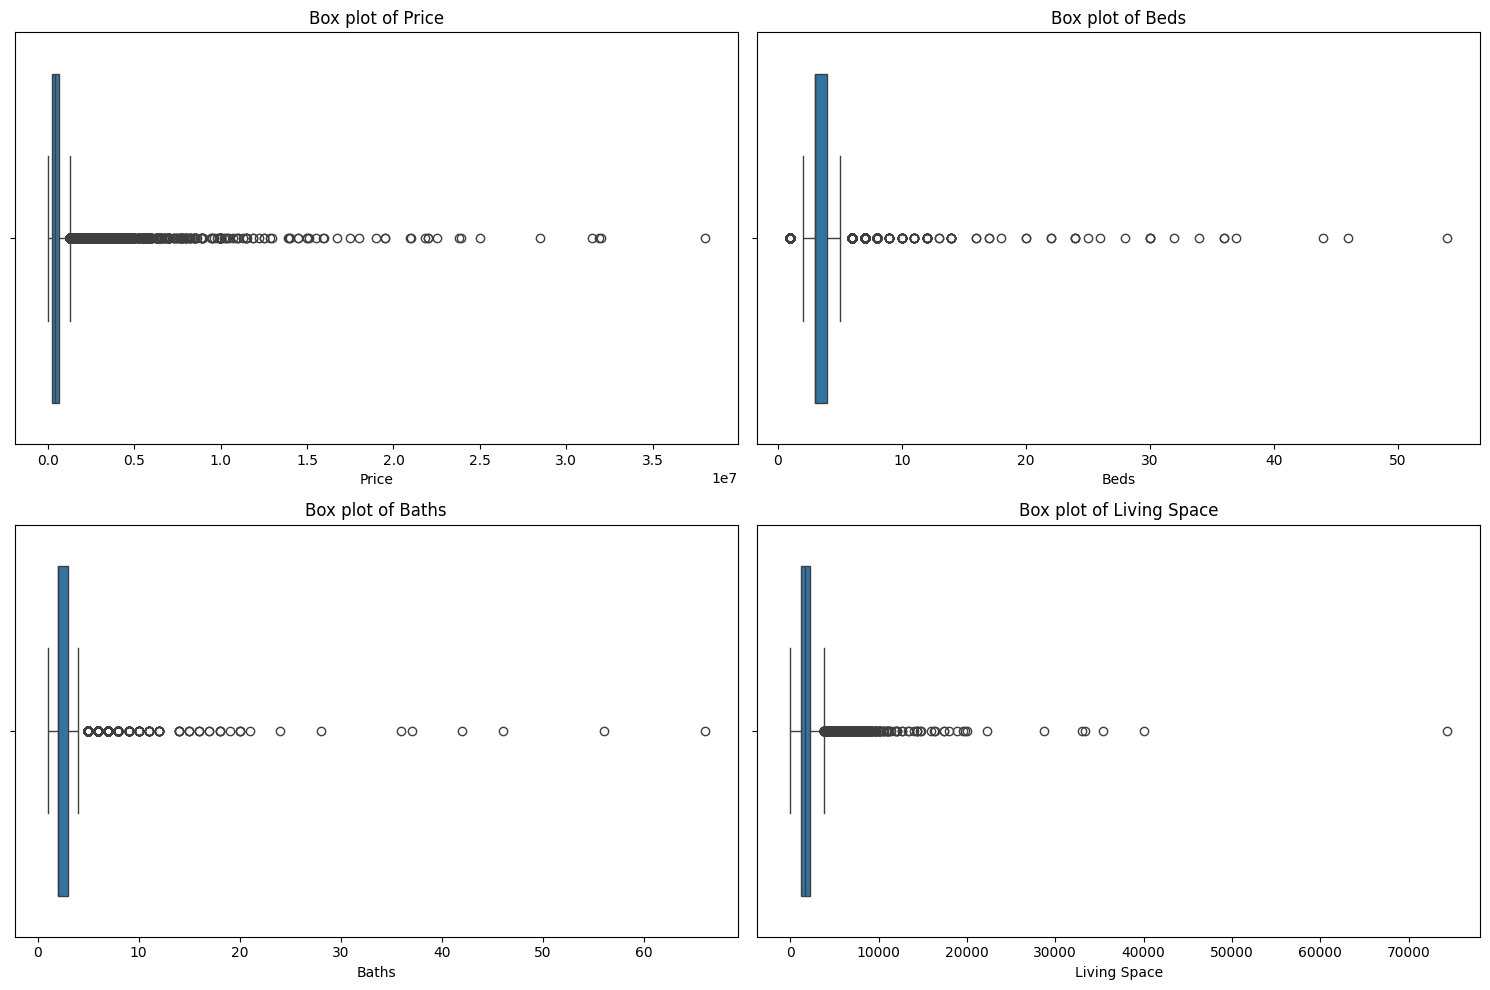

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier Analysis
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for 'Price'
plt1 = sns.boxplot(x=original_data['Price'], ax=axs[0, 0])
plt1.set_title('Box plot of Price')

# Box plot for 'Beds'
plt2 = sns.boxplot(x=original_data['Beds'], ax=axs[0, 1])
plt2.set_title('Box plot of Beds')

# Box plot for 'Baths'
plt3 = sns.boxplot(x=original_data['Baths'], ax=axs[1, 0])
plt3.set_title('Box plot of Baths')

# Box plot for 'Living Space'
plt4 = sns.boxplot(x=original_data['Living Space'], ax=axs[1, 1])
plt4.set_title('Box plot of Living Space')

plt.tight_layout()
plt.show()


Treatment for outliers. A common method is Winsorization which replaces extreme values with less extreme ones.

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize 'Price' variable
winsorized_price = winsorize(original_data['Price'], limits=(0.05, 0.05))

# Winsorize 'Beds' variable
winsorized_beds = winsorize(original_data['Beds'], limits=(0.05, 0.05))

# Winsorize 'Baths' variable
winsorized_baths = winsorize(original_data['Baths'], limits=(0.05, 0.05))

# Winsorize 'Living Space' variable
winsorized_living_space = winsorize(original_data['Living Space'], limits=(0.05, 0.05))

# Replace original values with winsorized values
original_data['Price'] = winsorized_price
original_data['Beds'] = winsorized_beds
original_data['Baths'] = winsorized_baths
original_data['Living Space'] = winsorized_living_space


Plot after Winsorize.

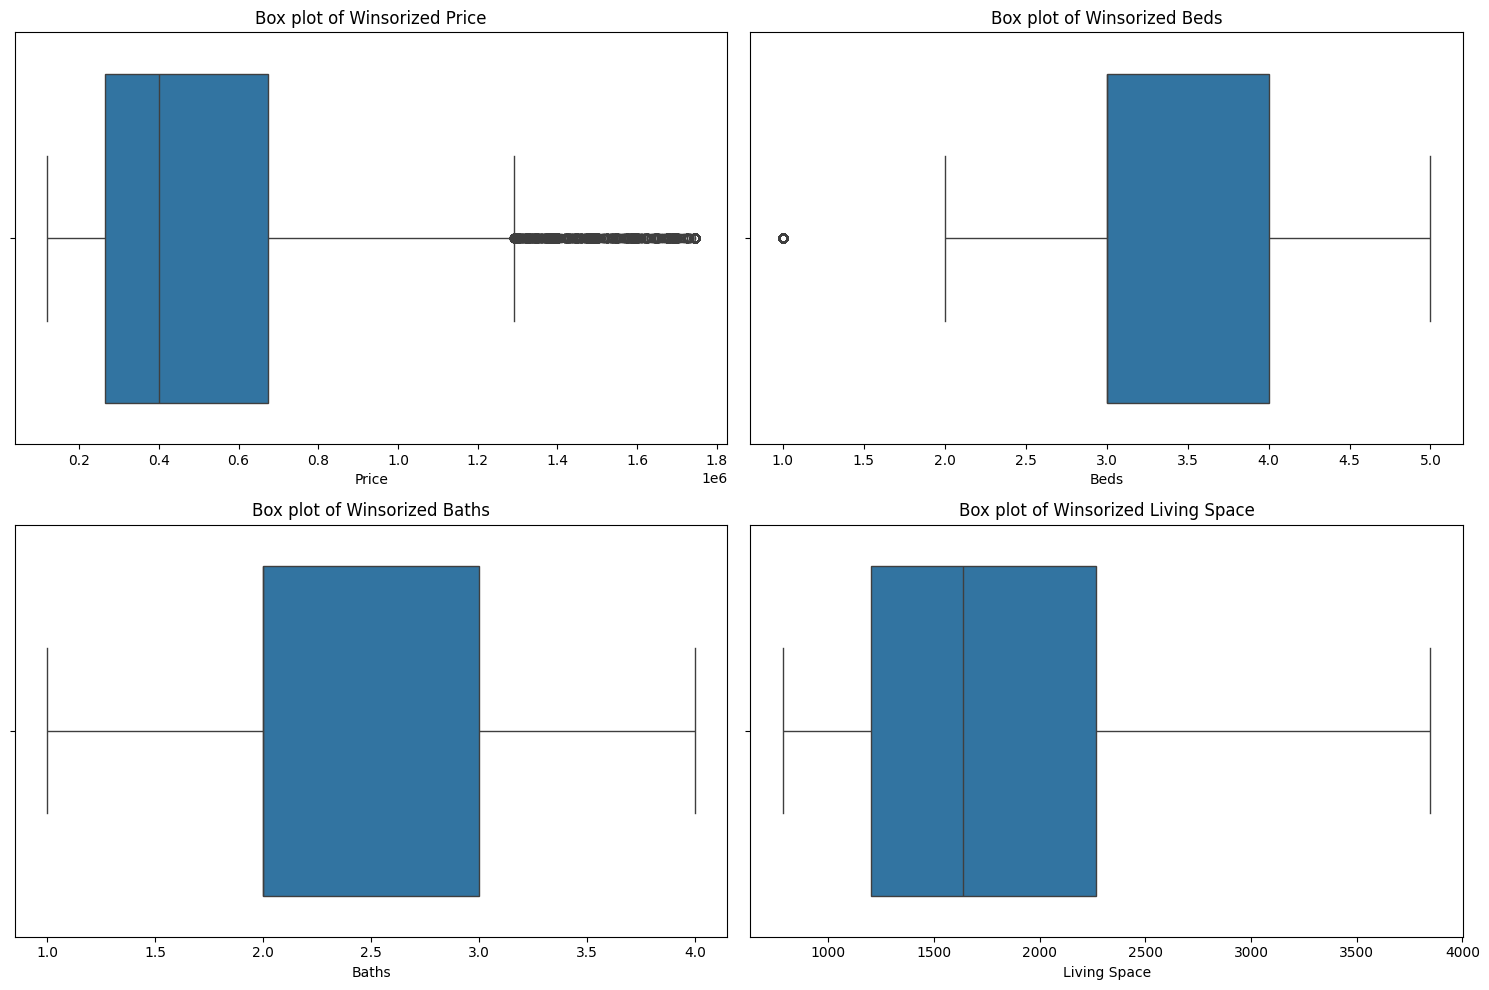

In [ ]:

# Plot box plots for each variable after winsorizing
plt.figure(figsize=(15, 10))

# Box plot for 'Price' after winsorizing
plt.subplot(2, 2, 1)
sns.boxplot(x=original_data['Price'])
plt.title('Box plot of Winsorized Price')

# Box plot for 'Beds' after winsorizing
plt.subplot(2, 2, 2)
sns.boxplot(x=original_data['Beds'])
plt.title('Box plot of Winsorized Beds')

# Box plot for 'Baths' after winsorizing
plt.subplot(2, 2, 3)
sns.boxplot(x=original_data['Baths'])
plt.title('Box plot of Winsorized Baths')

# Box plot for 'Living Space' after winsorizing
plt.subplot(2, 2, 4)
sns.boxplot(x=original_data['Living Space'])
plt.title('Box plot of Winsorized Living Space')

plt.tight_layout()
plt.show()

**Exploratory Data Analysis (EDA)**

Distribution of each predictor and dependent variable.

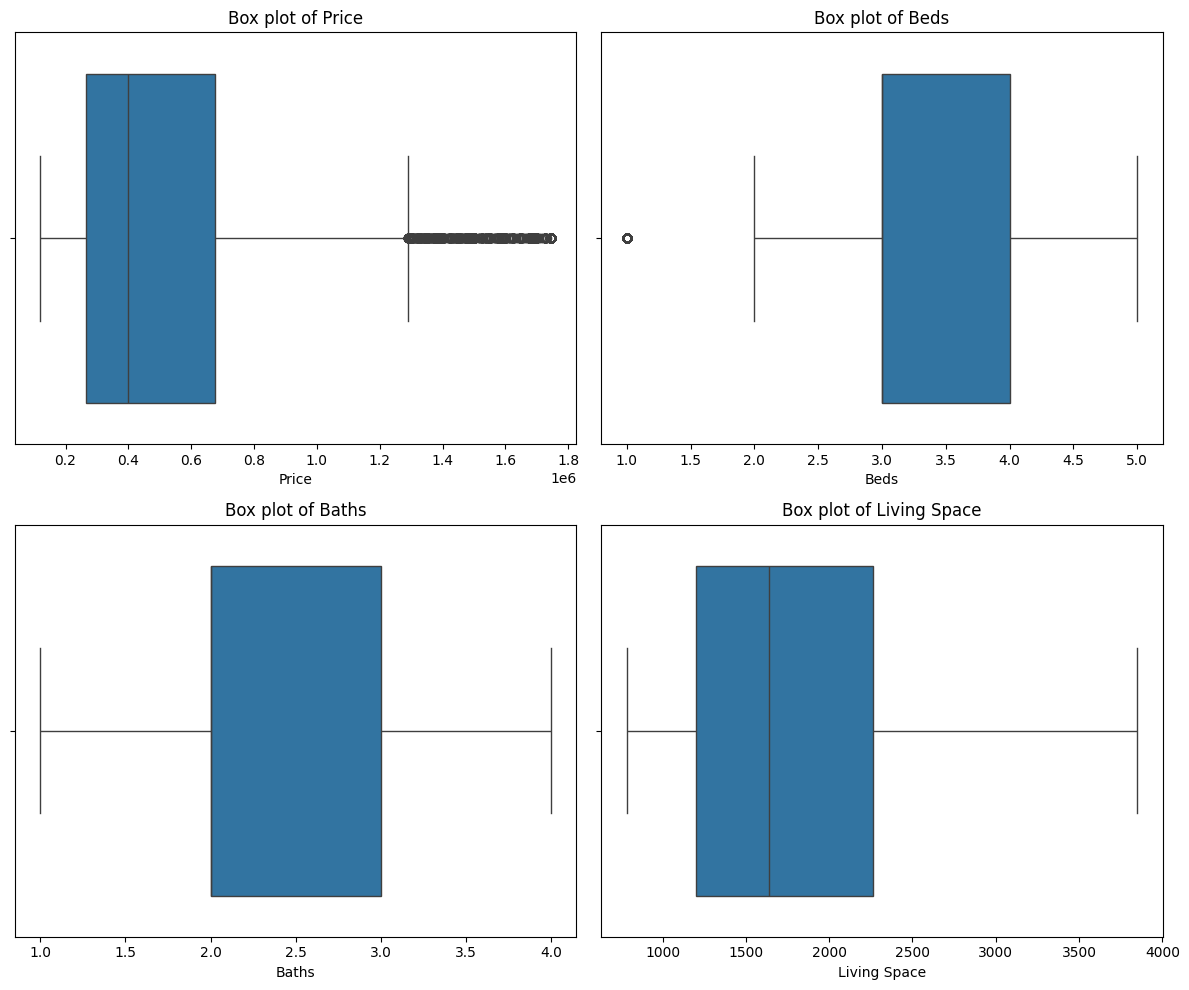

In [ ]:
# Set up the figure grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Box plots for each variable
sns.boxplot(x=original_data['Price'], ax=axs[0, 0])
axs[0, 0].set_title('Box plot of Price')

sns.boxplot(x=original_data['Beds'], ax=axs[0, 1])
axs[0, 1].set_title('Box plot of Beds')

sns.boxplot(x=original_data['Baths'], ax=axs[1, 0])
axs[1, 0].set_title('Box plot of Baths')

sns.boxplot(x=original_data['Living Space'], ax=axs[1, 1])
axs[1, 1].set_title('Box plot of Living Space')

plt.tight_layout()
plt.show()



Correlation matrix to understand relationships between variables.

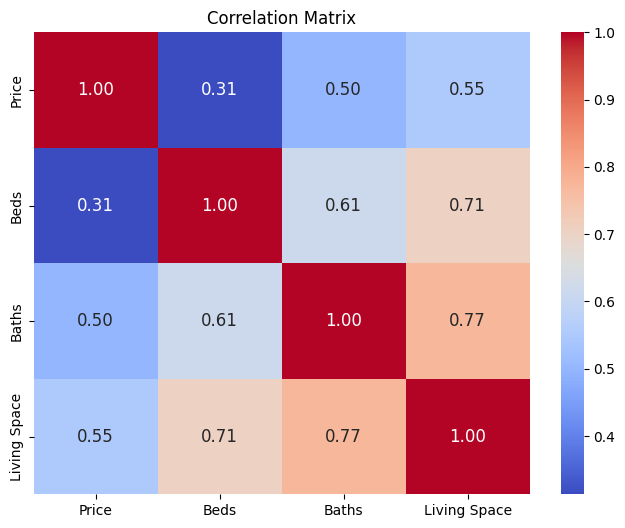

In [ ]:
# Correlation matrix
correlation_matrix = original_data[['Price', 'Beds', 'Baths', 'Living Space']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()


Price to Living Space: 0.55 indicates a moderately positive correlation between the price of a house and its living space. It suggests a moderate linear relationship. On average as the living space increases, so does the price.

Price to Baths: 0.50 indicates a moderately positive correlation between the price of a house and its bathrooms. It suggests a moderate linear relationship. On average as the bathrooms increase, so does the price.

Price to Beds: 0.31 indicates a weak positive correlation between the price of a house and its bedrooms. It suggests a weak linear relationship. On average as the bedrooms increase, the price tends to increase only slightly.

Weak correlation: Absolute value of correlation coeficient between 0 and 0.3

Moderate correlation: Absolute value of correlation coefficient between 0.3 and 0.7

Strong correlation: Absolute value of correlation coefficient between 0.7 and 1

Pair plots to visualize relationships.

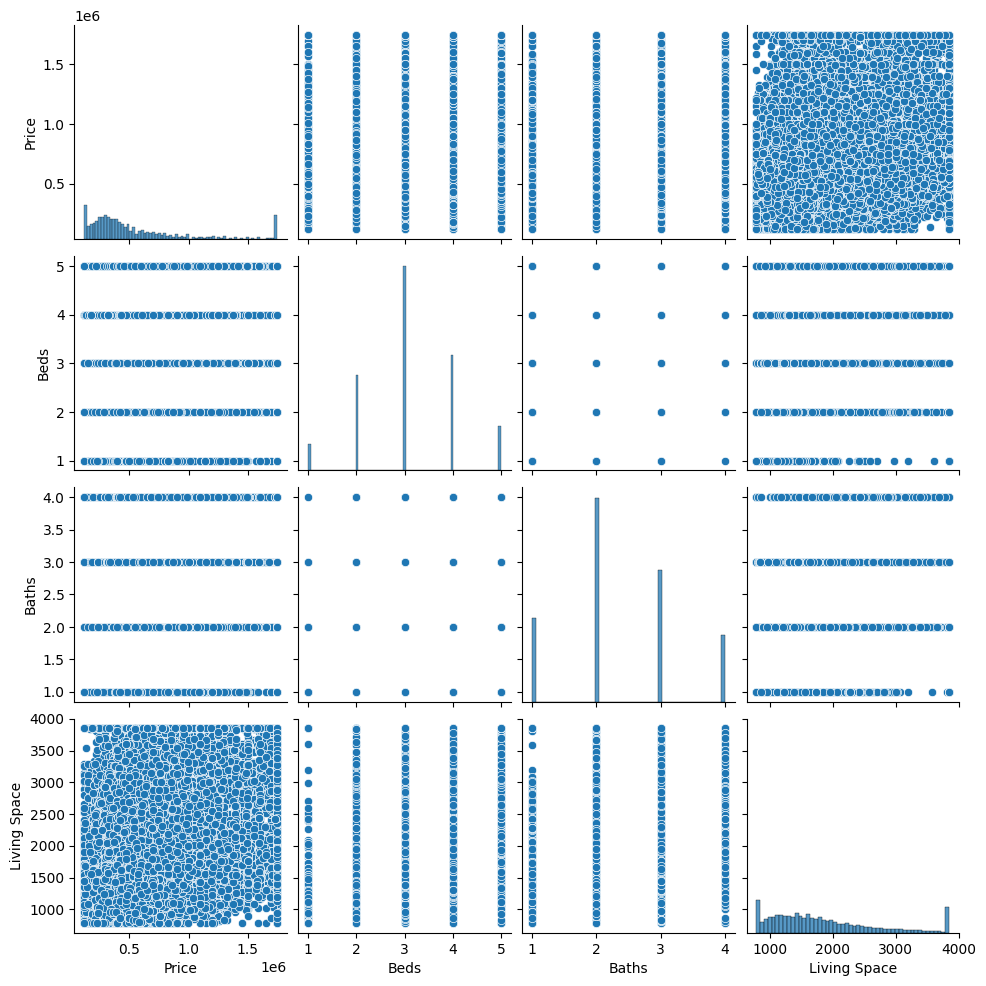

In [ ]:
# Pair plots for all variables
sns.pairplot(original_data[['Price', 'Beds', 'Baths', 'Living Space']])
plt.show()


Assumption Checks for Multiple Linear Regression

Linearity

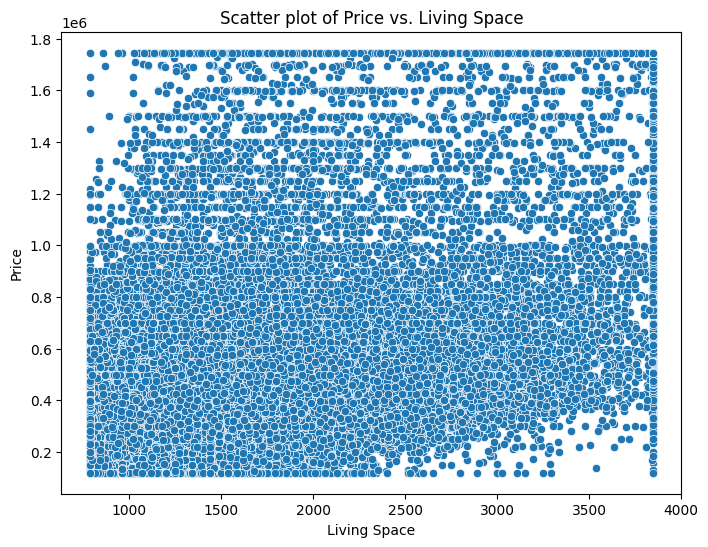

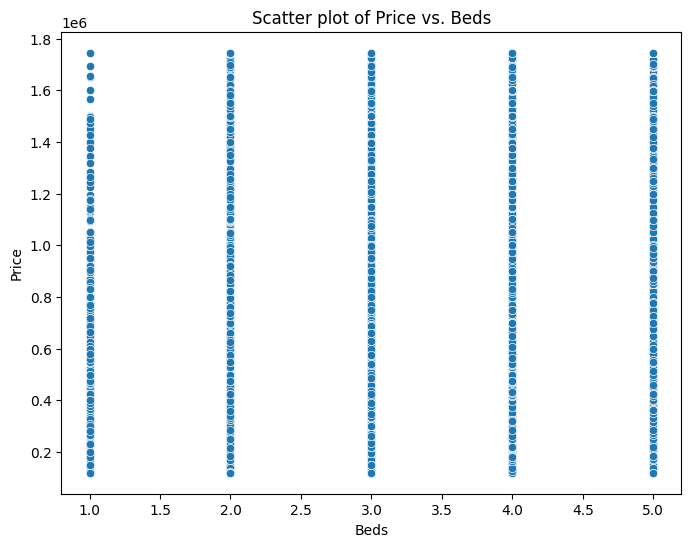

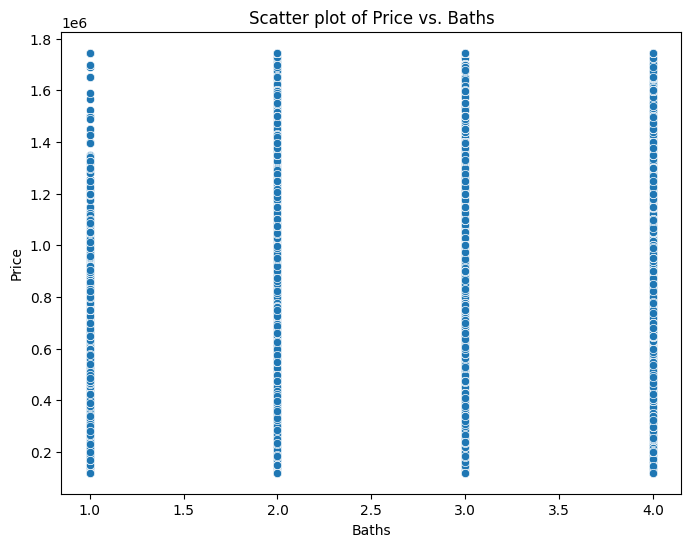

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Price vs. Living Space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=original_data['Living Space'], y=original_data['Price'])
plt.title('Scatter plot of Price vs. Living Space')
plt.xlabel('Living Space')
plt.ylabel('Price')
plt.show()

# Scatter plot of Price vs. Beds
plt.figure(figsize=(8, 6))
sns.scatterplot(x=original_data['Beds'], y=original_data['Price'])
plt.title('Scatter plot of Price vs. Beds')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

# Scatter plot of Price vs. Baths
plt.figure(figsize=(8, 6))
sns.scatterplot(x=original_data['Baths'], y=original_data['Price'])
plt.title('Scatter plot of Price vs. Baths')
plt.xlabel('Baths')
plt.ylabel('Price')
plt.show()


With so many datapoints, we will attempt scatterplot with a subset of the data. Manually calculate partial residuals and create the plots.

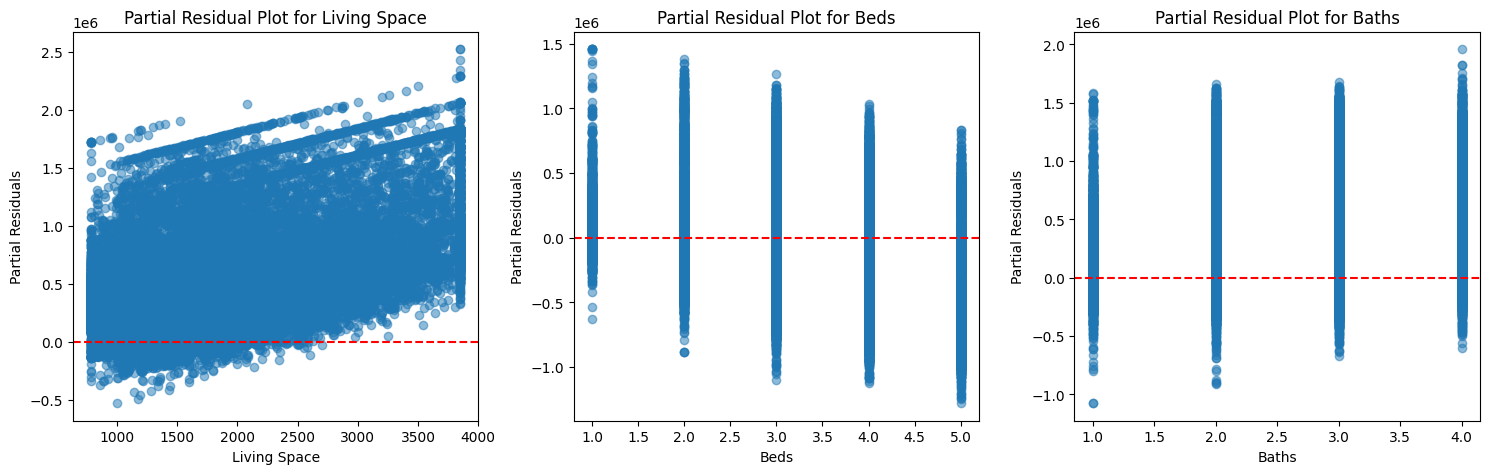

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Fit the multiple linear regression model
X = original_data[['Living Space', 'Beds', 'Baths']]
y = original_data['Price']
X = sm.add_constant(X)  # Add a constant term
model = sm.OLS(y, X).fit()

# Calculate partial residuals
partial_residuals = {}
for col in ['Living Space', 'Beds', 'Baths']:
    X_partial = X.drop(col, axis=1)
    model_partial = sm.OLS(y, X_partial).fit()
    partial_residuals[col] = model_partial.resid + X[col] * model.params[col]

# Plot partial residual plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (col, residuals) in enumerate(partial_residuals.items()):
    axs[i].scatter(original_data[col], residuals, alpha=0.5)
    axs[i].axhline(y=0, color='r', linestyle='--')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Partial Residuals')
    axs[i].set_title(f'Partial Residual Plot for {col}')

plt.tight_layout()
plt.show()


Check the independence of errors assumption, use Durbin-Watson.

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic
durbin_watson_statistic = durbin_watson(model.resid)

print("Durbin-Watson statistic:", durbin_watson_statistic)


Durbin-Watson statistic: 0.6514482198741459


With Durbin-Watson statistic: 0.6514482198741459 it suggests significant autocorrelation in the residuals. There may be some patterns or dependencies present in the errors, which violates the assumption of independence(because it is significantly less than 2).

Homoscedasticity, or the assumption of constant variance of errors. Violations of this can lead to inefficient parameter estimates and incorrect inference.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)
print("Breusch-Pagan test p-value:", bp_test[1])

# Perform White test
white_test = het_white(model.resid, model.model.exog)
print("White test p-value:", white_test[1])


Breusch-Pagan test p-value: 0.0
White test p-value: 0.0


Breusch-Pagan test p-value: 0.0
White test p-value: 0.0

In statistical hypothesis testing, a low p-value indicates strong evidence against the null hypothesis that there is no relationship.

There is heteroscedasticity present in the data, the variance of the residuals is not constant across different levels of the independent variables.

Shapiro-Wilk test for normality of errors. It assesses whether the residuals from the regression model are normally distributed.

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality of residuals
shapiro_test = shapiro(model.resid)

# Print test statistic and p-value
print("Shapiro-Wilk test statistic:", shapiro_test[0])
print("Shapiro-Wilk test p-value:", shapiro_test[1])


Shapiro-Wilk test statistic: 0.8924081325531006
Shapiro-Wilk test p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test statistic: 0.8924081325531006
Shapiro-Wilk test p-value: 0.0

This assesses the H0 that the residuals are normally distributed.

P-value 0.0 < significance level (0.05) we reject the null hypothesis (that there is no relationship). However, there is a warning that ("p-value may not be accurate for N > 5000.").



Calculate the Variance Inflation Factor (VIF) for the predictors. It is a measure to assess multicollinearity among the predictor variables in a regression model to quantify how much of a variance of an estimated regression coefficient is increased due to multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract the independent variables (excluding the intercept)
X = original_data[['Beds', 'Baths', 'Living Space']]

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print("Variance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
       Variable        VIF
0          Beds  14.473405
1         Baths  17.673008
2  Living Space  18.284505


0          Beds  14.473405<br>
1         Baths  17.673008<br>
2  Living Space  18.284505<br>

In general values over 10 indicate a high degree of multicollinearity, suggesting the corresponding predictor variable is highly correlated with the other predictors in the model.  It apears there is significant multicollinearity among Beds, Baths, and Living Spaces.

Conclusion of EDA: the scatter plot analysis, Durbin-Watson Test, Breusch-Pagan Test, Shapiro-Wilk Test and Variance Inflation factor, there appears to be some violations that can affect the reliability and validity of the regression analysis results. It suggests rejecting the null hypothesis (H0) that the regression model is appropriate or that the model's assumptions were met.

Perform Pearson Correlation

In [ ]:
from scipy.stats import pearsonr

# List of variable pairs
variable_pairs = [('Price', 'Baths'), ('Price', 'Beds'), ('Price', 'Living Space')]

# Calculate Pearson correlation coefficient and p-value for each pair
for pair in variable_pairs:
    # Extract variables from the pair
    variable1, variable2 = pair

    # Calculate Pearson correlation coefficient and p-value
    corr_coeff, p_value = pearsonr(df[variable1], df[variable2])

    print(f'Pearson correlation coefficient between {variable1} and {variable2}: {corr_coeff}')
    print(f'P-value: {p_value}')

    # Interpret the correlation coefficient
    if corr_coeff > 0:
        print('There is a positive correlation.')
    elif corr_coeff < 0:
        print('There is a negative correlation.')
    else:
        print('There is no correlation.')

    print()


Pearson correlation coefficient between Price and Baths: 0.4620718344470033
P-value: 0.0
There is a positive correlation.

Pearson correlation coefficient between Price and Beds: 0.27707172727608964
P-value: 0.0
There is a positive correlation.

Pearson correlation coefficient between Price and Living Space: 0.5205648281675832
P-value: 0.0
There is a positive correlation.



There seems to be a positive relationship between the price of a house and each of the preditor variables: Baths, Beds, and Living Space.

**Summary of conclusions**

The analysis revealed significant positive correlations between house prices and the number of bathrooms, bedrooms, and living space area. However, violations of the assumptions such as non-normality heteroscedasticity, and multicollinearity were detected which may affect the reliability of the regression  model. Recommendations include addressing assumptions violations and exploring alternative regression models or transformations to improve model performance. This leads to reject the null hypothesis (H0) in favor of the alternative hypothesis (H1), which suggests that there is a relationship between the predictors and the dependent variable.

#PART 2

We're using this data from Kaggle for MULTIPLE LINEAR REGRESSION:

[Advertising data](https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/input)

Investigate sales as the dependent variable, the rest of the columns are the predictors.

Note: Make sure to check assumptions. Are there assumptions that are violated?


Outline for Multiple Linear Regression on American House Prices
1. Introduction

    Brief overview of the dataset from Kaggle.
    https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/input


    Using Advertising.csv

    Objective: To investigate the relationship between sales and the predictors: number of TV, Radio, Newspaper.

    The sales are in thousands of units and the budget is in thousands of dollars.

2. Data Understanding

    Description of the dataset.
        Source: Kaggle. https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression/input
        Key variables: Sales (dependent), TV, Radio, Newspaper (independent).

3. Data Preprocessing

    Handling missing values.
    Data type conversion if necessary.
    Descriptive statistics of the dataset.
    Analysis of outliers if necessary.

4. Exploratory Data Analysis (EDA)

    Distribution of each predictor and the dependent variable.
    Correlation matrix to understand relationships between variables.
    Pair plots to visualize relationships.

5. Assumption Checks for Multiple Linear Regression

    Linearity:
        Scatter plots of predictors vs. the dependent variable.
    Independence:
        Durbin-Watson test for autocorrelation.
    Homoscedasticity:
        Breusch-Pagan and White tests.
    Normality:
        Shapiro-Wilk test for normality of residuals.
    Multicollinearity:
        Variance Inflation Factor (VIF) for predictors.

6. Perform Pearson Correlation

Load the data. Display first few rows of dataframe.

In [ ]:
import pandas as pd

# Load the original CSV file
original_data = pd.read_csv('Advertising.csv')

# Display first few rows of dataframe
print("First few rows of dataframe:")
print(original_data.head())

First few rows of dataframe:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


For Sales, TV, Radio, Newspaper display the datatype, and number of rows.

H0: There is no relationship.
H1: There is a relationship.

IV: TV, Radio, Newspaper
DV: Sales

Unnamed is the index.

In [ ]:
#Display first few rows of dataframe
print("First few rows of dataframe:")
print(original_data[['TV', 'Radio', 'Newspaper', 'Sales']].head())

# Print columns and/or data types
print("\nColumns and data types:")
print(original_data[['TV', 'Radio', 'Newspaper', 'Sales']].dtypes)

# Display number of rows
num_rows = len(original_data)
print("\nNumber of rows:", num_rows)

First few rows of dataframe:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Columns and data types:
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Number of rows: 200


Data Type: float64

Number of rows: 200

Check for missing values.

In [ ]:
missing_values = original_data[['TV', 'Radio', 'Newspaper', 'Sales']].isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Missing values: 0

Summary Statistics:

In [ ]:
# Get summary stats
summary_stats = original_data[['TV', 'Radio', 'Newspaper', 'Sales']].describe()
print("\nSummary statistics:")
print(summary_stats)


Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


Understand typical values and variability in the dataset.<br>
Count: 200 - Count shows there are no missing values. This verifies isnull() above.<br>

Review for potential outliers.

In [ ]:

columns = ['TV', 'Radio', 'Newspaper', 'Sales']

# Define a dictionary to store outliers for each column
outliers = {}

for column_name in columns:
    data_column = original_data[column_name]

    # Calculate quartiles
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers[column_name] = original_data[(data_column < lower_bound) | (data_column > upper_bound)]

# Print outliers for each column
for column_name, outlier_df in outliers.items():
    print("Outliers in '{}' column:".format(column_name))
    print(outlier_df)
    print()

Outliers in 'TV' column:
Empty DataFrame
Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
Index: []

Outliers in 'Radio' column:
Empty DataFrame
Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
Index: []

Outliers in 'Newspaper' column:
     Unnamed: 0     TV  Radio  Newspaper  Sales
16           17   67.8   36.6      114.0   12.5
101         102  296.4   36.3      100.9   23.8

Outliers in 'Sales' column:
Empty DataFrame
Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
Index: []



There are two outliers identified in Newspaper with a value of 114.0 and 100.9. They fall outside the range defined by lower and upper bounds calculated using IQR method.

Verify with visual.

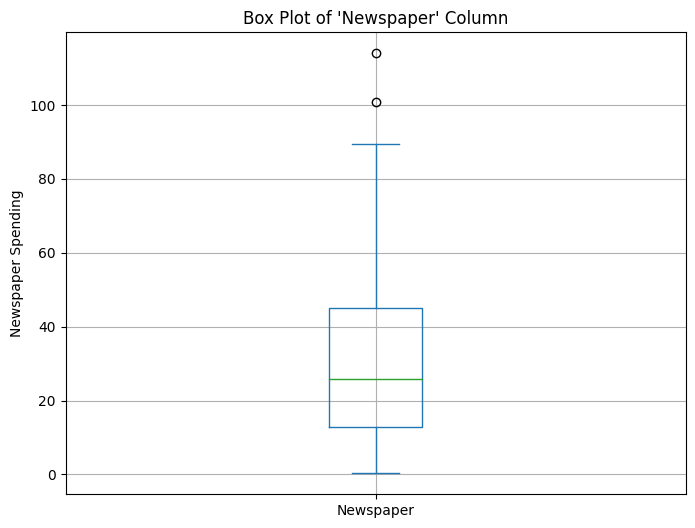

In [ ]:
import matplotlib.pyplot as plt

# Plot box plot for 'Newspaper' column
plt.figure(figsize=(8, 6))
original_data['Newspaper'].plot(kind='box')
plt.title("Box Plot of 'Newspaper' Column")
plt.ylabel("Newspaper Spending")
plt.grid(True)
plt.show()


Removing 2 should not significantly impact dataset or statistical properties. We consider removing them.

In [ ]:
# Remove outliers from 'Newspaper' column
cleaned_data = original_data.drop(outliers['Newspaper'].index)

# Verify the removal
print("Dataset size before removing outliers:", original_data.shape)
print("Dataset size after removing outliers:", cleaned_data.shape)


Dataset size before removing outliers: (200, 5)
Dataset size after removing outliers: (198, 5)


There are now 198 rows after removing the two outliers in Newspaper column.

Plot after removal:

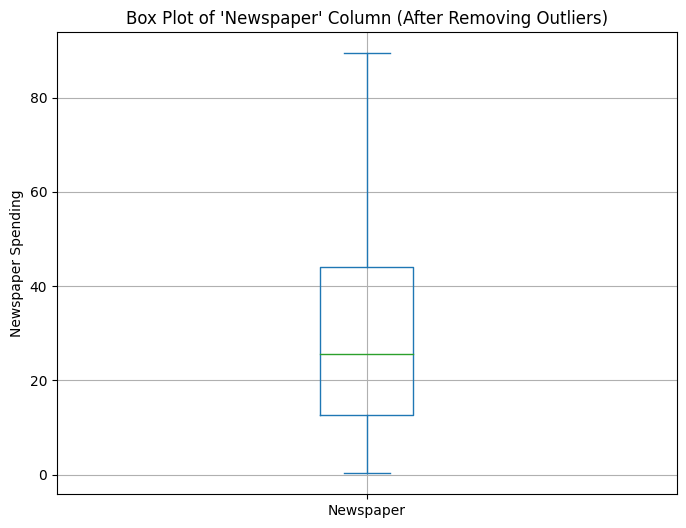

In [ ]:
import matplotlib.pyplot as plt

# Plot box plot for 'Newspaper' column after removing outliers
plt.figure(figsize=(8, 6))
cleaned_data['Newspaper'].plot(kind='box')
plt.title("Box Plot of 'Newspaper' Column (After Removing Outliers)")
plt.ylabel("Newspaper Spending")
plt.grid(True)
plt.show()


**Exploratory Data Analysis (EDA)**

Distribution of each predictor and dependent variable.

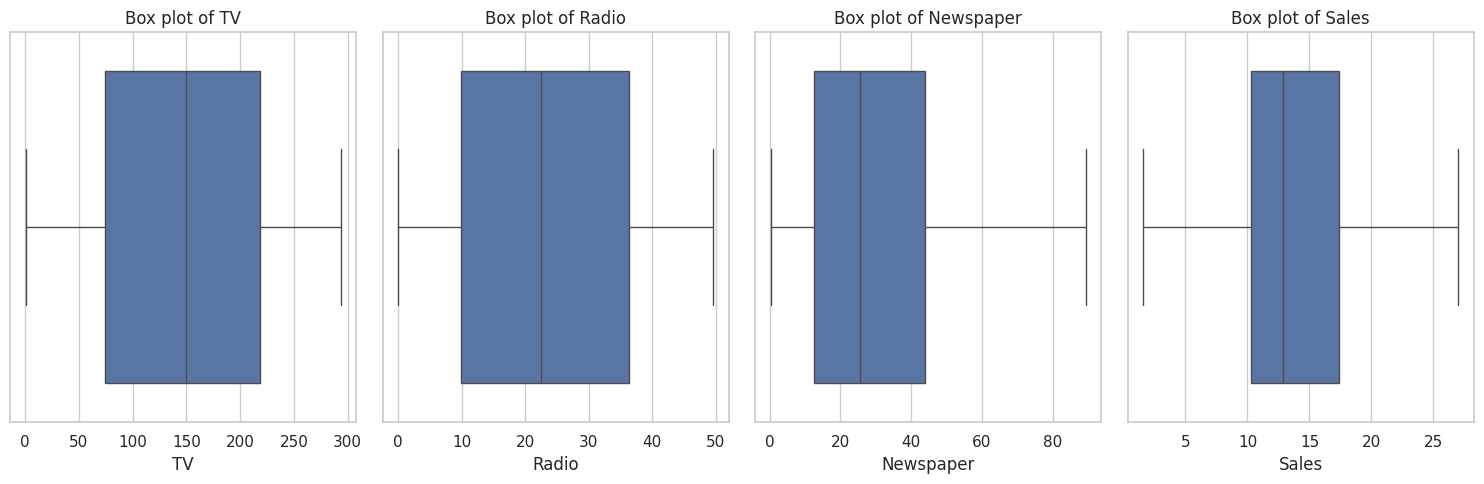

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Extract predictors and dependent variable
predictors = ['TV', 'Radio', 'Newspaper']
dependent_variable = 'Sales'

# Set up the figure grid
fig, axs = plt.subplots(1, len(predictors) + 1, figsize=(15, 5))

# Box plots for predictors
for i, predictor in enumerate(predictors):
    sns.boxplot(x=cleaned_data[predictor], ax=axs[i])
    axs[i].set_title(f'Box plot of {predictor}')

# Box plot for dependent variable
sns.boxplot(x=cleaned_data[dependent_variable], ax=axs[len(predictors)])
axs[len(predictors)].set_title(f'Box plot of {dependent_variable}')

plt.tight_layout()
plt.show()


Correlation matrix to understand relationships between variables.

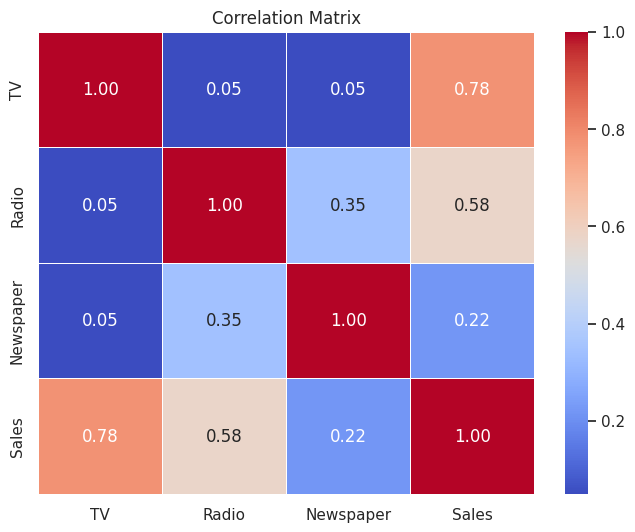

In [ ]:
# Extract predictors and dependent variable
predictors = ['TV', 'Radio', 'Newspaper']
dependent_variable = 'Sales'

# Include dependent variable in the list of variables
variables = predictors + [dependent_variable]

# Calculate the correlation matrix
correlation_matrix = cleaned_data[variables].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


The correlation coefficient between Sales and TV is 0.78 suggesting a strong positive linear relationship between advertising moneys spent on TV and Sales. As expenditure on TV advertising increases, sales tend to increase as well.

The correlation coefficient between Sales and Radio is 0.58. This indicates a moderate positive linear relationship between advertising money spent on radio and sales, although TV is stronger.

The correlation coefficient between Sales and Newspaper is 0.22 suggesting a weak positive linear relationship between advertising spent o newspaper and sales. Expenditure on newspaper advertising has less of an impact.

Pair plots to visualize relationships.

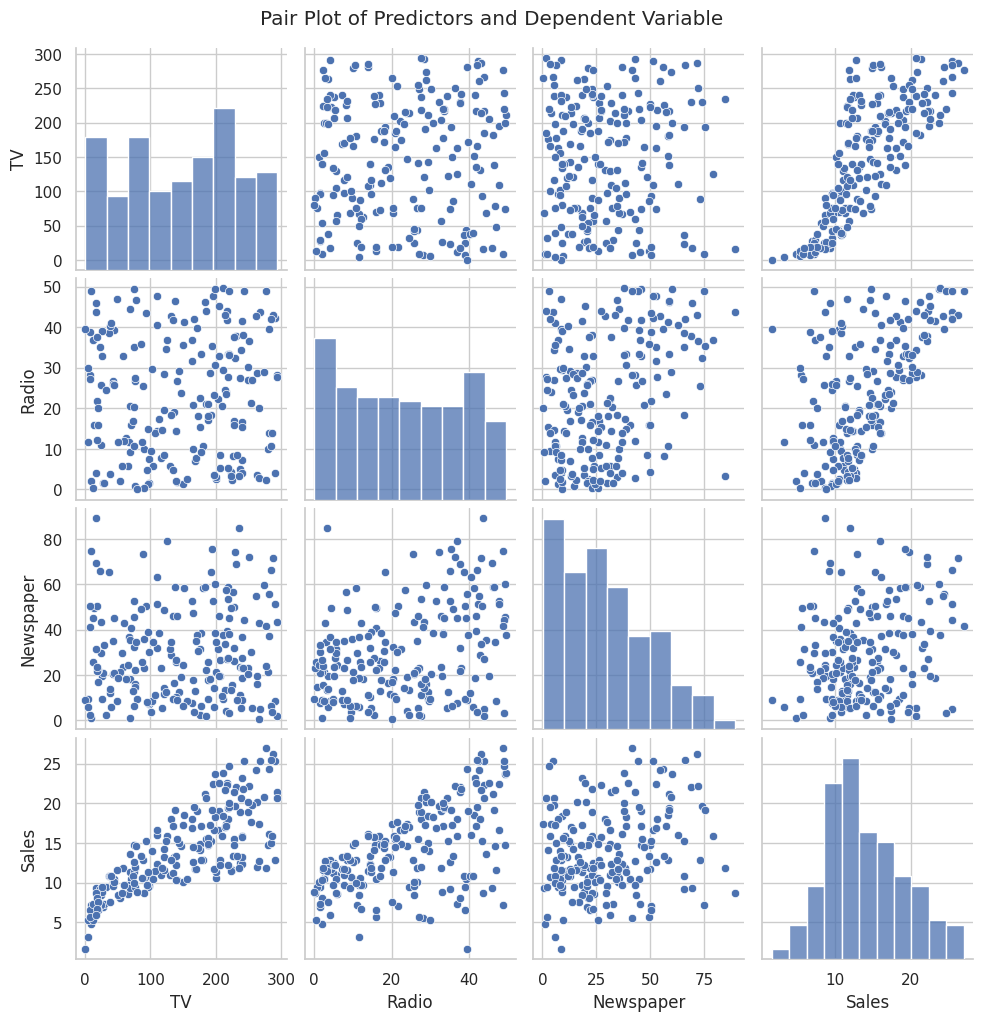

In [ ]:
# Extract predictors and dependent variable
predictors = ['TV', 'Radio', 'Newspaper']
dependent_variable = 'Sales'

# Include dependent variable in the list of variables
variables = predictors + [dependent_variable]

# Create pair plot
sns.pairplot(cleaned_data[variables])
plt.suptitle('Pair Plot of Predictors and Dependent Variable', y=1.02)
plt.show()

Assumption Checks for Multiple Linear Regression

Linearity

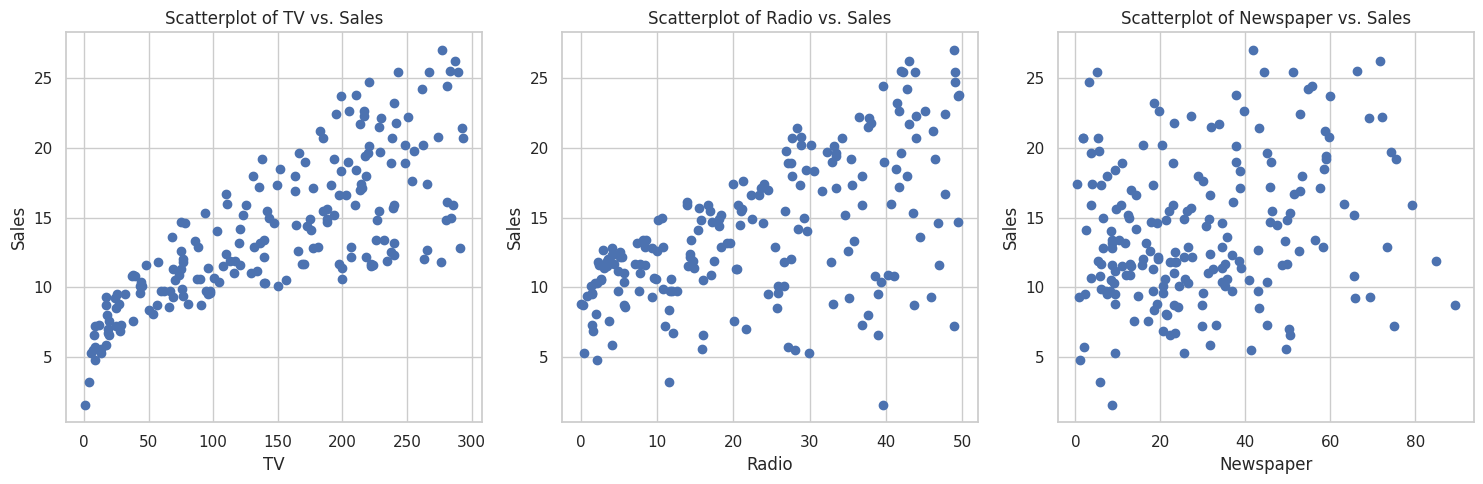

In [ ]:

# Extract predictors and dependent variable
predictors = ['TV', 'Radio', 'Newspaper']
dependent_variable = 'Sales'

# Create scatterplots
plt.figure(figsize=(15, 5))

for i, predictor in enumerate(predictors, 1):
    plt.subplot(1, len(predictors), i)
    plt.scatter(cleaned_data[predictor], cleaned_data[dependent_variable])
    plt.xlabel(predictor)
    plt.ylabel(dependent_variable)
    plt.title(f'Scatterplot of {predictor} vs. {dependent_variable}')

plt.tight_layout()
plt.show()

Check the independence of errors assumption, use Durbin-Watson.

In [ ]:
import statsmodels.api as sm

# Fit the multiple linear regression model
X = cleaned_data[predictors]
y = cleaned_data[dependent_variable]
X = sm.add_constant(X)  # Add a constant term to the predictors
model = sm.OLS(y, X).fit()

# Perform Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.resid)

print("Durbin-Watson statistic:", durbin_watson_statistic)


Durbin-Watson statistic: 2.0407815957072595


Durbin-Watson statistic: 2.0407815957072595. It is close to 2 (typically between 1.5 and 2.5), it suggests no significant autocorrelation in the residuals of the multiple linear regression model. This indicates the independence of errors assumption is not violated and there's not a systematic pattern or structure in the residuals that is not captured by the model.

Homoscedasticity, or the assumption of constant variance of errors. Violations of this can lead to inefficient parameter estimates and incorrect inference.

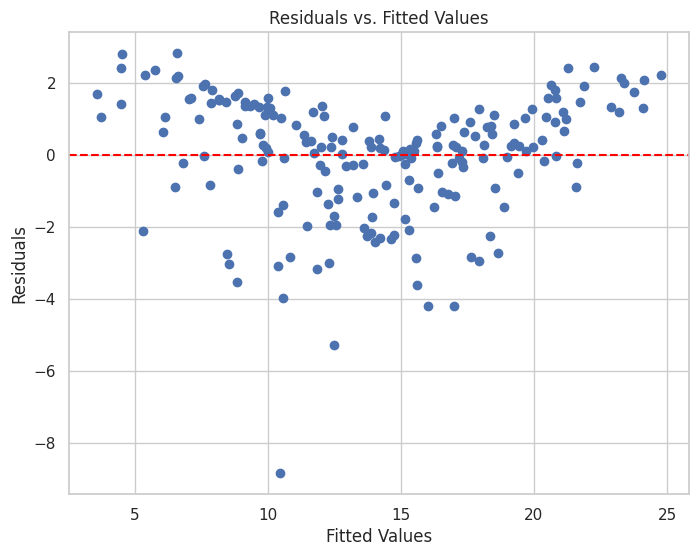

In [ ]:
import statsmodels.api as sm

# Fit the multiple linear regression model
X = cleaned_data[predictors]
y = cleaned_data[dependent_variable]
X = sm.add_constant(X)  # Add a constant term to the predictors
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


Test for heteroscedasticity.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform Breusch-Pagan test
lm, p_value_bp, f_value_bp, f_p_value_bp = het_breuschpagan(model.resid, X)
print("Breusch-Pagan test p-value:", p_value_bp)



Breusch-Pagan test p-value: 0.1668420779608482


In [ ]:
from statsmodels.stats.diagnostic import het_white

# Perform White test
lm_white, p_value_white, f_value_white, f_p_value_white = het_white(model.resid, X)
print("White test p-value:", p_value_white)


White test p-value: 5.2460245028532896e-11


Breusch-Pagan test p-value: 0.1668420779608482<br>
White test p-value: 5.2460245028532896e-11

Breusch-Pagan P-value 0.1668 > significance level 0.05, we fail to reject null hypothesis of homoscedasticity suggesting there's no significant evidence of heteroscedasticity.

White test P-value 5.246e-11 < significance level 0.05, very small, thus we reject the null hypothesos of homoscedasticity.

The two tests appear to have conflicting results.

Shapiro-Wilk test for normality of errors. It assesses whether the residuals from the regression model are normally distributed.

In [ ]:
from scipy.stats import shapiro

# Extract residuals from the regression model
residuals = model.resid

# Perform Shapiro-Wilk test
shapiro_statistic, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk test p-value:", shapiro_p_value)


Shapiro-Wilk test p-value: 4.315524382292324e-09


Shapiro-Wilk test p-value: 4.315524382292324e-09 extremely small and < significance level of 0.05, we reject the null hypothesis that residuals are normally distributed; indicating there is significant evidence that the residuals do not follow a normal distribution.

A violation of the normality assumption in this case.

Calculate the Variance Inflation Factor (VIF) for the predictors. It is a measure to assess multicollinearity among the predictor variables in a regression model to quantify how much of a variance of an estimated regression coefficient is increased due to multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = X.copy()  # X contains the predictors
vif_data = vif_data.drop(columns='const')  # Drop the constant term

vif_series = pd.Series([variance_inflation_factor(vif_data.values, i)
                        for i in range(vif_data.shape[1])],
                       index=vif_data.columns)

print("Variance Inflation Factors:")
print(vif_series)


Variance Inflation Factors:
TV           2.502183
Radio        3.275285
Newspaper    3.126386
dtype: float64


TV           2.502183
Radio        3.275285
Newspaper    3.126386

These are all < 5 which indicates moderate multicollinearity, and that it is not a severe issue in the regression model and the coefficient estimates are likely to be reliable.

Conclusion of EDA:

Advertising expenditures on TV and radio exhibit strong positive correlations with sales (newspaper is weak). The data at most assumptions for multiple linear regression with the exception of a potention heteroscedasticity and non-normality.

Perform Pearson Correlation

In [ ]:
# Calculate Pearson correlation coefficients
correlation_matrix = cleaned_data[['TV', 'Radio', 'Newspaper', 'Sales']].corr(method='pearson')

# Display correlation matrix
print("Pearson Correlation Coefficients:")
print(correlation_matrix)


Pearson Correlation Coefficients:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.051978   0.049771  0.779121
Radio      0.051978  1.000000   0.346364  0.576748
Newspaper  0.049771  0.346364   1.000000  0.219555
Sales      0.779121  0.576748   0.219555  1.000000


TV and Sales: strong positive correlation of ~ 0.779<br>
Radio and Sales: moderate positive correlation of ~ 0.577<br>
Newspaper and Sales: weak positive correlation of ~ 0.22

This appears to support the initial findings from the EDA hilighting the importance of TV advertising to drive sales, followed by radio, and at a weaker level sales.

**Summary of conclusions**

The analysis indicates strong positive correlations between TV and radio advertising expenditures with sales. Newpaper advertising shows a weaker association. Most assumptions for multiple linear regressions have been met with the exception of homoscedasticity and normality of residuals(errors). Overall, it is possible we should allocate fewer resources to newspaper advertising, or at least consider it. There is not enough evidence to reject the null.